In [2576]:
# % matplotlib inline

import numpy as np
from sklearn.svm import SVC
from matplotlib import cm
import matplotlib.pyplot as plt

plt.style.use(plt.style.available[0])  #可以通过下标进行选择适合自己的画图样式
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification

In [2577]:
# 两个信息特性，每个类一个集群
X, y = make_classification(n_samples=1000,  #(default=100)样本数
                           n_features=2,  #(default=20)特征序总数。这些包括随机绘制的n_informative信息特征，n_redundant冗余特征，n_repeated重复特征和n_features-n_informative-n_redundant-n_repeated无用特征。
                           n_redundant=0,  #(default=2)冗余特征数量
                           n_repeated=0,  #(default=0)从信息性和冗余性特征中随机抽取的重复性特征的数量。
                           n_informative=1,  #有效特征个数
                           n_clusters_per_class=1,  #(default=2)每个类的簇数
                           n_classes=2,  #(default=2)分类问题的类（或标签）数
                           flip_y=0.5,  #(default=0.01)类别随机分配的样本比例
                           random_state=2,  #确定用于生成数据集的随机数生成。 为多个函数调用传递可重复输出的int值。
                           )


In [2578]:
print('X= ', X[:3])
print('y= ', y[:5])
print(X.shape, X.ndim)
print(y.shape, y.ndim)

X=  [[ 1.275  1.064]
 [ 0.902  0.122]
 [-0.841  0.355]]
y=  [1 1 0 1 0]
(1000, 2) 2
(1000,) 1


In [2579]:
#将数据划分为训练集和验证集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [2580]:
# 3. 特征工程（标准化）
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

# 测试集 计算平均值和标准偏差 缩放特征集
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)
# X = standardScaler.fit_transform(X)


In [2581]:
# Fit regression model
classifiers = [
    SVC(kernel="rbf", C=.5,  #浮点数，默认= 1.0 正则化参数。正则化的强度与C成反比。必须严格为正。此惩罚系数是l2惩罚系数的平方
        gamma=1,  #浮点数或者{‘scale’, ‘auto’} , 默认=’scale’ 核系数包含‘rbf’, ‘poly’ 和‘sigmoid’
        # 如果gamma='scale'(默认)，则它使用1 / (n_features * X.var())作为gamma的值，如果是auto，则使用1 / n_features。在0.22版本有改动：默认的gamma从“auto”改为“scale”。
        probability=True,  #是否启用概率估计。必须在调用fit之前启用此参数，因为该方法内部使用5折交叉验证，因此会减慢该方法的速度
        ),
    SVC(kernel="linear", C=1, gamma=1, probability=True),
    SVC(kernel="poly", C=1, gamma="auto", degree=3, coef0=1, probability=True),
]

names = [
    "RBF SVM",
    "Linear SVM",
    "poly",
]

In [2582]:
for name, clf in zip(names, classifiers):
    performance = clf.fit(X_train, y_train.ravel())
    # 获取预测值
    y_test_pred = performance.predict(X_test)
    # 显示估计器
    print(f'%s, svcs=%s' % (name, clf))
    # 获取这个估计器的参数
    print(f'估计器的参数: %s' % (clf.get_params()))
    # https://blog.csdn.net/gracejpw/article/details/101546293
    # 返回预测的决定系数R^2
    # R^2越接近于1，模型的拟合优度越高。
    print(f'训练集R2评分: %.2f ' % (clf.score(X_train, y_train)))
    print(f'测试集R2评分: %.2f ' % (clf.score(X_test, y_test)))


RBF SVM, svcs=SVC(C=0.5, gamma=1, probability=True)
估计器的参数: {'C': 0.5, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.73 
测试集R2评分: 0.70 
Linear SVM, svcs=SVC(C=1, gamma=1, kernel='linear', probability=True)
估计器的参数: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
训练集R2评分: 0.72 
测试集R2评分: 0.70 
poly, svcs=SVC(C=1, coef0=1, gamma='auto', kernel='poly', probability=True)
估计器的参数: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'max_i

In [2583]:
#设定numpy显示浮点数精度的小数位数,不使用科学记数法
np.set_printoptions(precision=3, suppress=True)
# 核函数返回参数介绍
# clf所使用的分类器
clf = classifiers[0]
print('kernel 核函数名称', clf.kernel)  #核函数名称
print('support_ 形如%s的数组,支持向量的下标,显示前10个 \n=%s'
      % (clf.support_.shape, clf.support_[:10]))  #形如(n_SV,)的数组,支持向量的指标。
print('support_vectors_ 形如%s的数组,支持向量, 显示前3行 \n=%s'
      %(clf.support_vectors_.shape, clf.support_vectors_[:3]))  #形如(n_SV, n_features)的数组, 支持向量
print('n_support_ 形如%s的数组,每个类别的支持向量数量, \n=%s'
      %(clf.n_support_.shape, clf.n_support_))  #形如(n_class)的数组，每个类别的支持向量数量。
print('dual_coef_ 形如%s的数组,决策函数中支持向量的对偶系数, \n=%s'  #形如(n_class-1, n_SV)的数组, 决策函数中支持向量的对偶系数
      %(clf.dual_coef_.shape, clf.dual_coef_[:3,:5]))  #显示前三个类型的前3个系数
print(#clf.coef_ 形如(n_class * (n_class-1) / 2, n_features)的数组,分配给特征的权重（原始问题的系数），仅在线性内核的情况下可用。
    ('coef_ 形如%s的数组,分配给特征的权重, \n=%s，仅在线性内核的情况下可用'%(clf.coef_.shape, clf.coef_)) if clf.kernel == 'linear' else 0)
print('intercept_ 形如%s的数组,添加到决策函数的常量（也称为偏差或截距）, \n=%s'%(clf.intercept_.shape,clf.intercept_))  #形如(n_class * (n_class-1) / 2,)的数组,决策函数中的常量。
print('fit_status_ 如果拟合无误，则为0；如果算法未收敛，则为1,fit_status_=',clf.fit_status_)  #整数型 如果拟合无误，则为0；如果算法未收敛，则为1
print('classes_ 形如%s的数组 不重复的类别标签, \n=%s'  #二分类情况下就只有2个标签
      %(clf.classes_.shape, clf.classes_))  #形如(n_classes,)的数组 不重复类别标签
print('probA_ 形如(%s * (%s-1) / 2,)=%s的数组, \n=%s, 如果 probability=False，则为空数组。'
      %(clf.classes_.size,clf.classes_.size,clf.probA_.shape, clf.probA_)
      )  #probA_ 形如(n_class * (n_class-1) / 2,)的数组
'''如果 probability=True，则它对应于在普拉特缩放中学习的参数，以根据决策值产生概率估计。

普拉特定标使用逻辑函数1 /（1 + exp（decision_value * probA_ + probB_）），
其中从数据集[2]了解probA_和probB_。有关多类案件和培训程序的更多信息，请参见[1]的第8节。'''
print('probB_ 形如(%s * (%s-1) / 2,)=%s的数组, \n=%s, 如果 probability=False，则为空数组。'
      %(clf.classes_.size,clf.classes_.size,clf.probB_.shape, clf.probB_))

print('class_weight_ 形如(%s,)的数组每个类的参数C的乘数。根据 class_weight 参数进行计算。\n=%s'
      %(clf.classes_.size, clf.class_weight_)
      )  #形如(n_class,)的数组每个类的参数C的乘数。根据class_weight参数进行计算。

print('shape_fit_ 形如(n_dimensions_of_X,)的整数型元祖 训练向量X的数组维度', clf.shape_fit_)

kernel 核函数名称 rbf
support_ 形如(483,)的数组,支持向量的下标,显示前10个 
=[ 0  1  6  7 10 13 14 15 17 21]
support_vectors_ 形如(483, 2)的数组,支持向量, 显示前3行 
=[[ 0.009  1.241]
 [ 0.634 -0.693]
 [-1.302 -0.912]]
n_support_ 形如(2,)的数组,每个类别的支持向量数量, 
=[244 239]
dual_coef_ 形如(1, 483)的数组,决策函数中支持向量的对偶系数, 
=[[-0.5 -0.5 -0.5 -0.5 -0.5]]
0
intercept_ 形如(1,)的数组,添加到决策函数的常量（也称为偏差或截距）, 
=[-0.188]
fit_status_ 如果拟合无误，则为0；如果算法未收敛，则为1,fit_status_= 0
classes_ 形如(2,)的数组 不重复的类别标签, 
=[0 1]
probA_ 形如(2 * (2-1) / 2,)=(1,)的数组, 
=[-1.056], 如果 probability=False，则为空数组。
probB_ 形如(2 * (2-1) / 2,)=(1,)的数组, 
=[-0.119], 如果 probability=False，则为空数组。
class_weight_ 形如(2,)的数组每个类的参数C的乘数。根据 class_weight 参数进行计算。
=[1. 1.]
shape_fit_ 形如(n_dimensions_of_X,)的整数型元祖 训练向量X的数组维度 (750, 2)


In [2584]:
print('classes_ 类别标签 =',clf.classes_)
print('predict_proba 返回测试样本的各类标签 概率. 每行概率合计为 1 显示前10行\n', clf.predict_proba(X_test)[:10])
print('predict 返回测试样本的所属类别标签,显示前30行\npredict', clf.predict(X_test)[:30])
print('y_test ',y_test[:30])
id_test = clf.predict(X_test) != y_test  #测试样本预测类别与测试目标类别不同的下标
print('测试样本预测类别与测试目标类别不同的由predict_proba计算的概率值, 显示前10行\n',clf.predict_proba(X_test)[id_test][:10])
print('predict 返回训练样本的所属类别标签,显示前10行\npredict', clf.predict(X_train)[:10])
print('y_train',y_train[:30])

classes_ 类别标签 = [0 1]
predict_proba 返回测试样本的各类标签 概率. 每行概率合计为 1 显示前10行
 [[0.763 0.237]
 [0.77  0.23 ]
 [0.282 0.718]
 [0.27  0.73 ]
 [0.764 0.236]
 [0.278 0.722]
 [0.279 0.721]
 [0.776 0.224]
 [0.318 0.682]
 [0.763 0.237]]
predict 返回测试样本的所属类别标签,显示前30行
predict [0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0]
y_test  [0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1]
测试样本预测类别与测试目标类别不同的由predict_proba计算的概率值, 显示前10行
 [[0.27  0.73 ]
 [0.278 0.722]
 [0.279 0.721]
 [0.776 0.224]
 [0.763 0.237]
 [0.763 0.237]
 [0.439 0.561]
 [0.275 0.725]
 [0.772 0.228]
 [0.355 0.645]]
predict 返回训练样本的所属类别标签,显示前10行
predict [0 1 0 0 1 1 0 0 0 0]
y_train [0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1]


In [2585]:
id_train_no = clf.predict(X_train)[:] != y_train  #训练样本预测类别与训练目标类别不同的下标
id_train_ok = clf.predict(X_train)[:] == y_train  #训练样本预测类别与训练目标类别不同的下标
print('训练样本预测类别与训练目标类别不同有%s 由predict_proba计算的概率值,显示前10行\n%s'
      %(id_train_no.shape, clf.predict_proba(X_train)[id_train_no][:10]) )
train_no = clf.predict_proba(X_train)[id_train_no]  #训练样本预测类别与训练目标类别不同的概率值
train_ok = clf.predict_proba(X_train)[id_train_ok]

# 统计训练样本预测类别不同的数据在5个等分区间内的个数,由于统计的是数组中所有值,所以统计个数是行*列的值
train_his_no = np.histogram(train_no,bins=10)
print('训练样本预测类别不同的区间个数统计%s\n概率统计区间分布%s'% train_his_no)
train_his_ok = np.histogram(train_ok,bins=10)
print('训练样本预测类别相同的区间个数统计%s\n概率统计区间分布%s'% (train_his_ok))

训练样本预测类别与训练目标类别不同有(750,) 由predict_proba计算的概率值,显示前10行
[[0.282 0.718]
 [0.765 0.235]
 [0.283 0.717]
 [0.267 0.733]
 [0.771 0.229]
 [0.765 0.235]
 [0.631 0.369]
 [0.762 0.238]
 [0.316 0.684]
 [0.767 0.233]]
训练样本预测类别不同的区间个数统计[68 92 17 15 13 13 15 17 92 68]
概率统计区间分布[0.211 0.269 0.327 0.385 0.442 0.5   0.558 0.615 0.673 0.731 0.789]
训练样本预测类别相同的区间个数统计[218 240  47  20  18  22  20  47 240 218]
概率统计区间分布[0.196 0.257 0.318 0.378 0.439 0.5   0.561 0.622 0.682 0.743 0.804]


In [2625]:
id_test_no = clf.predict(X_test)[:] != y_test  #测试样本预测类别与测试目标类别不同的下标
id_test_ok = clf.predict(X_test)[:] == y_test  #测试样本预测类别与测试目标类别不同的下标
print('测试样本预测类别与测试目标类别不同有%s 由predict_proba计算的概率值,显示前10行\n%s'
      %(id_test_no.shape, clf.predict_proba(X_test)[id_test_no][:10]) )
test_no = clf.predict_proba(X_test)[id_test_no]  #测试样本预测类别与测试目标类别不同的概率值
test_ok = clf.predict_proba(X_test)[id_test_ok]

# 统计测试样本预测类别不同的数据在5个等分区间内的个数,由于统计的是数组中所有值,所以统计个数是行*列的值
test_his_no = np.histogram(test_no,bins=10)
print('测试样本预测类别不同的区间个数统计%s\n概率统计区间分布%s'% test_his_no)
test_his_ok = np.histogram(test_ok,bins=10)
print('测试样本预测类别相同的区间个数统计%s\n概率统计区间分布%s'% (test_his_ok))


测试样本预测类别与测试目标类别不同有(250,) 由predict_proba计算的概率值,显示前10行
[[0.27  0.73 ]
 [0.278 0.722]
 [0.279 0.721]
 [0.776 0.224]
 [0.763 0.237]
 [0.763 0.237]
 [0.439 0.561]
 [0.275 0.725]
 [0.772 0.228]
 [0.355 0.645]]
测试样本预测类别不同的区间个数统计[21 36  7  7  4  4  7  7 36 21]
概率统计区间分布[0.213 0.27  0.328 0.385 0.443 0.5   0.557 0.615 0.672 0.73  0.787]
测试样本预测类别相同的区间个数统计[86 65 19  5  0  0  5 19 65 86]
概率统计区间分布[0.215 0.272 0.329 0.386 0.443 0.5   0.557 0.614 0.671 0.728 0.785]


11

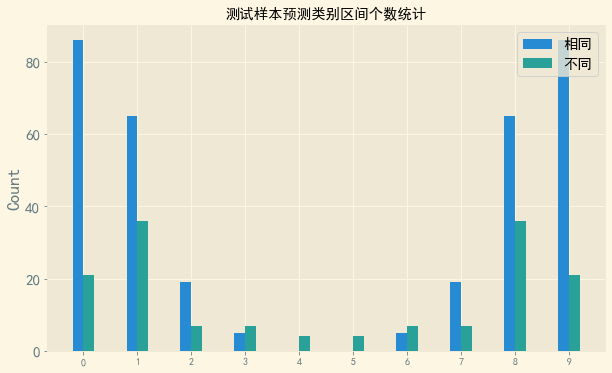

In [2682]:
plt.rcParams['font.sans-serif'] = ['SimHei']   #指定默认字体,用来正常显示中文标签
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

hist1,_ = np.histogram(test_ok, bins=10)
hist2,_ = np.histogram(test_no, bins=10)
# 绘制图像
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
plt.set_cmap('RdBu')
x = np.arange(len(_)-1)
w=0.1
# 绘制多个bar在同一个图中, 这里需要控制width
plt.bar(x-w, hist1, width = 2*w, align='center')
plt.bar(x+w, hist2, width = 2*w, align='center')
# 设置坐标轴的标签
ax1.yaxis.set_tick_params(labelsize=15) # 设置y轴的字体的大小
ax1.set_xticks(x) # 设置xticks出现的位置
# 设置坐标轴名称
ax1.set_ylabel("Count", fontsize='xx-large')
# 设置标题
ax1.set_title('测试样本预测类别区间个数统计', fontsize='x-large')
# 设置图例
plt.legend(('相同','不同'),fontsize = 'x-large', loc='upper right')
plt.show()

In [2587]:
print(X.shape, X.ndim)
print('standardScaler.mean_', standardScaler.mean_)  #均值
print('standardScaler.var_', standardScaler.var_)  #方差
print('x_train.var', np.var(X_train))  #方差
print('x_train.std', np.std(X_train))  #标准差
print('X_train=', X_train[:3])
print('X_test=', X_test[:3])
print('y_train=', y_train[:3])
print('y_test=', y_test[:3])


(1000, 2) 2
standardScaler.mean_ [-0.035 -0.026]
standardScaler.var_ [1.407 0.942]
x_train.var 0.9999999999999997
x_train.std 0.9999999999999998
X_train= [[ 0.009  1.241]
 [ 0.634 -0.693]
 [-1.527  0.845]]
X_test= [[-0.55   0.67 ]
 [-0.867  0.789]
 [ 1.015 -0.731]]
y_train= [0 0 1]
y_test= [0 0 1]
